In [1]:
from gfn import GFNAgent

In [2]:
agent = GFNAgent(epochs=200)

First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

In [ ]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [ ]:
agent.model.summary()

In [ ]:
agent.z0

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 0s 821us/step


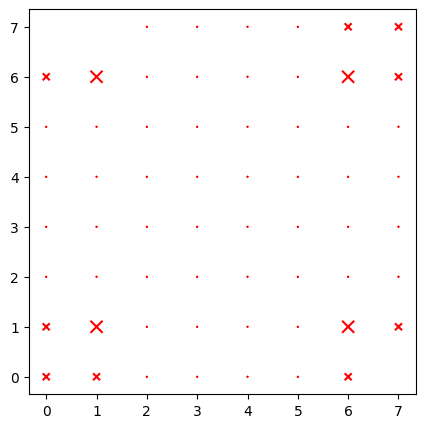

In [3]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [ ]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

In [ ]:
agent.plot_policy_2d()

In [ ]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [ ]:
agent.train()

Start training...
Epoch: 0 Loss: 6.70232629776001
Epoch: 9 Loss: 1.4518100023269653
Epoch: 18 Loss: 1.075038194656372
Epoch: 27 Loss: 1.1654704809188843
Epoch: 36 Loss: 1.5418745279312134
Epoch: 45 Loss: 0.8260231018066406
Epoch: 54 Loss: 1.0109044313430786
Epoch: 63 Loss: 1.5510368347167969
Epoch: 72 Loss: 0.3830437958240509
Epoch: 81 Loss: 0.27333053946495056
Epoch: 90 Loss: 0.16292443871498108
Epoch: 99 Loss: 0.44378313422203064
Epoch: 108 Loss: 0.10841599851846695
Epoch: 117 Loss: 0.039943795651197433
Epoch: 126 Loss: 0.11576277762651443
Epoch: 135 Loss: 0.023247653618454933
Epoch: 144 Loss: 0.01567516103386879


Let's plot the trained policy and sample from it to get a probability distribution over the environment:

In [ ]:
agent.plot_policy_2d()

In [ ]:
l1_error_after = agent.compare_env_to_model_policy()

In [ ]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)

In [2]:
from gfn import GFNAgent
agent = GFNAgent(epochs=200)
l = agent.sample_trajectories(2)

1/1 [==============================] - 0s 150ms/step
[[0.376489   0.25777655 0.36573445]
 [0.37648899 0.25777654 0.36573447]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 24ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.37648899 0.25777654 0.36573447]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 25ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 30ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 36ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[1. 0. 0.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 31ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.3333333

In [ ]:
l[0].shape, l[1].shape

In [ ]:
import tensorflow as tf
one_hot_positions = tf.one_hot(l[0][0], 8, axis=-1)
one_hot_positions[0]

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
for i, action in enumerate(tfd.Categorical(probs=l[1][0]).sample().numpy()):
    print(action == (agent.action_space - 1))

In [ ]:
l[1][0]